In [1]:
# Dataframe
import pandas as pd 
import numpy as np
    
# Data viz
import seaborn as sns
from matplotlib import pyplot as plt

# 1. Data acquisition

First of all, we need to acquire training and testing data from train_auto.csv and test_auto.csv.

In [2]:
# Import data to dataframe 
training_data = pd.read_csv("train_auto.csv", decimal=',')
testing_data = pd.read_csv("test_auto.csv", decimal=',')

In [3]:
# Have a global version about training and testing data. Try to verify data types, missing values, etc.
training_data.info()
print('_'*40)
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   object 
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [4]:
# Show first 5 lines of training dataset 
training_data.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [5]:
# Show 1 complete line 
training_data.iloc[1]

INDEX                            2
TARGET_FLAG                      0
TARGET_AMT                       0
KIDSDRIV                         0
AGE                           43.0
HOMEKIDS                         0
YOJ                           11.0
INCOME                     $91,449
PARENT1                         No
HOME_VAL                  $257,252
MSTATUS                       z_No
SEX                              M
EDUCATION            z_High School
JOB                  z_Blue Collar
TRAVTIME                        22
CAR_USE                 Commercial
BLUEBOOK                   $14,940
TIF                              1
CAR_TYPE                   Minivan
RED_CAR                        yes
OLDCLAIM                        $0
CLM_FREQ                         0
REVOKED                         No
MVR_PTS                          0
CAR_AGE                        1.0
URBANICITY     Highly Urban/ Urban
Name: 1, dtype: object

There are 8161 training data and 2141 testing data. Each dataset has 26 different columns.

Our prediction target is TARGET_FLAG, which is a binary variable (2 categories, 0 and 1). Therefore, we could consider that it is a supervised classification problem.

The machine learning algorithms that we could use are :

- Logistic Regression
- KNN
- Naive Bayes classifier
- Random Forrest (Decision Tree), etc.

Next step, to better understand which data shoud be used in our prediction, it's very important to make clear the meaning of each variable.


Here is a small presentation for each variable that I found on the Internet :


* INDEX - ID Variable in csv file.
* TARGET_FLAG - Was car in a crash? 1 = YES 0 = NO. The target variable in our prediction.
* TARGET_AMT - The cost for the accident, if car was in a crash.
* KIDSDRIV - driving with children ??
* AGE - Age of the driver.
* HOMEKIDS - Number of children at home.
* YOJ - Years of working.
* INCOME - Income.
* PARENT1 - Having parents alive ??
* HOME_VAL - House value.
* MSTATUS - Married or not.
* SEX - Gender.
* EDUCATION - Education level of the driver.
* JOB - Job.
* TRAVTIME - Dring time ??
* CAR_USE - Vehicle use.
* BLUEBOOK - Value of vehicle.
* TIF - ??
* CAR_TYPE - Type of car.
* RED_CAR - If a car was red or not.
* OLDCLAIM - Last claim value ??
* CLM_FREQ - Claims times.
* REVOKED - License revoked
* MVR_PTS - Points for driving ??
* CAR_AGE - Vehicle age.
* URBANICITY - Living Area.


From the statistic review above, AGE, YOJ, INCOME, HOME_VAL, JOB and CAR_AGE have missing values in both training and testing data.

In addition, there is always a currency symbol in some variables about money, like INCOME, HOME_VAL, etc, which brings on wrong data type problem when using datasets. In this case, we need to delete this symbol and transform the value into correct data type.

What's more, there are lots of string values start with "z_", which should also be corrected in the next step.

# 2. Data cleaning

In [6]:
train_df = training_data.copy()
test_df = testing_data.copy()

combine = [train_df, test_df]

In [7]:
# Currency symbol "$"
currency_columns = ['TARGET_AMT', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

for df in combine:
    for column in currency_columns:
        df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
        
# String values start with "z_"
for df in combine:
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].replace('[z_]', '', regex=True)

In [8]:
training_data.iloc[1]

INDEX                            2
TARGET_FLAG                      0
TARGET_AMT                       0
KIDSDRIV                         0
AGE                           43.0
HOMEKIDS                         0
YOJ                           11.0
INCOME                     $91,449
PARENT1                         No
HOME_VAL                  $257,252
MSTATUS                       z_No
SEX                              M
EDUCATION            z_High School
JOB                  z_Blue Collar
TRAVTIME                        22
CAR_USE                 Commercial
BLUEBOOK                   $14,940
TIF                              1
CAR_TYPE                   Minivan
RED_CAR                        yes
OLDCLAIM                        $0
CLM_FREQ                         0
REVOKED                         No
MVR_PTS                          0
CAR_AGE                        1.0
URBANICITY     Highly Urban/ Urban
Name: 1, dtype: object

The cleaning is OK. Currency symbol and "z_" have been solved

In [9]:
training_data.describe()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,2978.893962,0.440728,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


In [10]:
training_data.describe(include=['O'])

,TARGET_AMT,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY
count,8161,7716,8161,7697,8161,8161,8161,7635,8161,8161,8161,8161,8161,8161,8161
unique,1949,6612,2,5106,2,2,5,8,2,2789,6,2,2857,2,2
top,0,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,Private,"$1,500",z_SUV,no,$0,No,Highly Urban/ Urban
freq,6008,615,7084,2294,4894,4375,2330,1825,5132,157,2294,5783,5009,7161,6492


# 3. Data processing and analysing

# Missing values

## 1 TARGET_AMT

INDEX is the ID value in train_auto.csv and test_auto.csv, which has no influence to our prediction. Therefore, this column could be removed.

TARGET_AMT is highly related with TARGET_FLAG, which means if TARGET_FLAG was 1, there would be an amount to pay and if it was 0, the amount would be 0 too. Since the goal is to predict TARGET_FLAG, we dont need TARGET_AMT in this case.

In [11]:
# Remove INDEX and TARGET_AMT columns
train_df = train_df.drop(['TARGET_AMT'], axis=1)
test_df = test_df.drop(['TARGET_AMT'], axis=1)

combine = [train_df, test_df]

## 2 AGE

To fill up missing ages, we choosed to use median values depending on SEX.

- For exemple, using the median age of females to fill missing ages of females.

In [12]:
# Show median age of each gender
train_df.groupby(['SEX'])['AGE'].median()

SEX
F    44.0
M    46.0
Name: AGE, dtype: float64

In [13]:
test_df.groupby(['SEX'])['AGE'].median()

SEX
F    44.0
M    46.0
Name: AGE, dtype: float64

In [14]:
for df in combine:
    df.loc[(df['AGE'].isnull()) & (df['SEX'] == 'F'), 'AGE'] = 44
    df.loc[(df['AGE'].isnull()) & (df['SEX'] == 'M'), 'AGE'] = 46

In [15]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   KIDSDRIV     8161 non-null   int64  
 3   AGE          8161 non-null   float64
 4   HOMEKIDS     8161 non-null   int64  
 5   YOJ          7707 non-null   float64
 6   INCOME       7716 non-null   float64
 7   PARENT1      8161 non-null   object 
 8   HOME_VAL     7697 non-null   float64
 9   MSTATUS      8161 non-null   object 
 10  SEX          8161 non-null   object 
 11  EDUCATION    8161 non-null   object 
 12  JOB          7635 non-null   object 
 13  TRAVTIME     8161 non-null   int64  
 14  CAR_USE      8161 non-null   object 
 15  BLUEBOOK     8161 non-null   float64
 16  TIF          8161 non-null   int64  
 17  CAR_TYPE     8161 non-null   object 
 18  RED_CAR      8161 non-null   object 
 19  OLDCLA

## 3 JOB

We chose the job that appears most often (mode job) in a chosen range to fill missing jobs.

We found the mod job in different education level + use of car and then filled them depending on sample's education level and use of car.

- For exemple : If a person had High School level and his car was for commercail use, we could consider his job was "Blue Collar"

In [16]:
train_df.groupby(['EDUCATION', 'CAR_USE'])['JOB'].agg(lambda x:x.value_counts().index[0])

EDUCATION     CAR_USE   
<High School  Commercial     Blue Collar
              Private           Clerical
Bachelors     Commercial     Blue Collar
              Private       Professional
High School   Commercial     Blue Collar
              Private           Clerical
Masters       Commercial         Manager
              Private             Lawyer
PhD           Commercial         Manager
              Private             Doctor
Name: JOB, dtype: object

In [17]:
test_df.groupby(['EDUCATION', 'CAR_USE'])['JOB'].agg(lambda x:x.value_counts().index[0])

EDUCATION     CAR_USE   
<High School  Commercial     Blue Collar
              Private           Clerical
Bachelors     Commercial     Blue Collar
              Private       Professional
High School   Commercial     Blue Collar
              Private           Clerical
Masters       Commercial         Manager
              Private             Lawyer
PhD           Commercial         Manager
              Private             Doctor
Name: JOB, dtype: object

In [18]:
# Fill missing jobs with mode values

In [19]:
for df in combine:
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == '<High School') & (df['CAR_USE'] == 'Commercial'), 'JOB'] = 'Blue Collar'
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == '<High School') & (df['CAR_USE'] == 'Private'), 'JOB'] = 'Clerical'
    
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'Bachelors') & (df['CAR_USE'] == 'Commercial'), 'JOB'] = 'Blue Collar'
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'Bachelors') & (df['CAR_USE'] == 'Private'), 'JOB'] = 'Professional'
    
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'High School') & (df['CAR_USE'] == 'Commercial'), 'JOB'] = 'Blue Collar'
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'High School') & (df['CAR_USE'] == 'Private'), 'JOB'] = 'Clerical'
    
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'Masters') & (df['CAR_USE'] == 'Commercial'), 'JOB'] = 'Manager'
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'Masters') & (df['CAR_USE'] == 'Private'), 'JOB'] = 'Lawyer'
    
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'PhD') & (df['CAR_USE'] == 'Commercial'), 'JOB'] = 'Manager'
    df.loc[(df['JOB'].isnull()) & (df['EDUCATION'] == 'PhD') & (df['CAR_USE'] == 'Private'), 'JOB'] = 'Doctor'

In [20]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   KIDSDRIV     8161 non-null   int64  
 3   AGE          8161 non-null   float64
 4   HOMEKIDS     8161 non-null   int64  
 5   YOJ          7707 non-null   float64
 6   INCOME       7716 non-null   float64
 7   PARENT1      8161 non-null   object 
 8   HOME_VAL     7697 non-null   float64
 9   MSTATUS      8161 non-null   object 
 10  SEX          8161 non-null   object 
 11  EDUCATION    8161 non-null   object 
 12  JOB          8161 non-null   object 
 13  TRAVTIME     8161 non-null   int64  
 14  CAR_USE      8161 non-null   object 
 15  BLUEBOOK     8161 non-null   float64
 16  TIF          8161 non-null   int64  
 17  CAR_TYPE     8161 non-null   object 
 18  RED_CAR      8161 non-null   object 
 19  OLDCLA

## 4 YOJ, INCOME and HOME_VAL

Since YOJ, INCOME and HOME_VAL are variables related to JOB, we chose to use median values for each job to fill missing values.

In [21]:
# Find median values for each variables
train_df.groupby('JOB')[['YOJ', 'INCOME', 'HOME_VAL']].median()

,YOJ,INCOME,HOME_VAL
JOB,,,
Blue Collar,12.0,54005.0,176935.0
Clerical,12.0,31094.5,136156.0
Doctor,12.0,125135.0,274721.0
Home Maker,5.0,508.0,92520.0
Lawyer,12.0,83033.0,229237.0
Manager,12.0,86574.0,227344.0
Professional,12.0,71791.0,214707.0
Student,7.0,591.0,0.0


In [22]:
test_df.groupby('JOB')[['YOJ', 'INCOME', 'HOME_VAL']].median()

,YOJ,INCOME,HOME_VAL
JOB,,,
Blue Collar,12.0,53328.5,176392.0
Clerical,12.0,29894.0,126436.5
Doctor,12.0,111318.0,293850.0
Home Maker,7.0,2214.0,91520.0
Lawyer,12.0,84506.0,222040.0
Manager,12.0,89287.5,232845.0
Professional,12.0,69357.0,199576.0
Student,0.0,0.0,0.0


In [23]:
# Show job class (unique value) in the training dataset 
job_list = train_df['JOB'].unique()
job_list

array(['Professional', 'Blue Collar', 'Clerical', 'Doctor', 'Lawyer',
       'Manager', 'Home Maker', 'Student'], dtype=object)

In [24]:
# Create a dictionary which will be used to fill missing values 
train_job_yoj_income = train_df.groupby('JOB')[['YOJ', 'INCOME', 'HOME_VAL']].median().to_dict('index')
test_job_yoj_income = test_df.groupby('JOB')[['YOJ', 'INCOME', 'HOME_VAL']].median().to_dict('index')

print('Training data: ', train_job_yoj_income)
print('-'*40)
print('Testing data: ', test_job_yoj_income)

Training data:  {'Blue Collar': {'YOJ': 12.0, 'INCOME': 54005.0, 'HOME_VAL': 176935.0}, 'Clerical': {'YOJ': 12.0, 'INCOME': 31094.5, 'HOME_VAL': 136156.0}, 'Doctor': {'YOJ': 12.0, 'INCOME': 125135.0, 'HOME_VAL': 274721.0}, 'Home Maker': {'YOJ': 5.0, 'INCOME': 508.0, 'HOME_VAL': 92520.0}, 'Lawyer': {'YOJ': 12.0, 'INCOME': 83033.0, 'HOME_VAL': 229237.0}, 'Manager': {'YOJ': 12.0, 'INCOME': 86574.0, 'HOME_VAL': 227344.0}, 'Professional': {'YOJ': 12.0, 'INCOME': 71791.0, 'HOME_VAL': 214707.0}, 'Student': {'YOJ': 7.0, 'INCOME': 591.0, 'HOME_VAL': 0.0}}
----------------------------------------
Testing data:  {'Blue Collar': {'YOJ': 12.0, 'INCOME': 53328.5, 'HOME_VAL': 176392.0}, 'Clerical': {'YOJ': 12.0, 'INCOME': 29894.0, 'HOME_VAL': 126436.5}, 'Doctor': {'YOJ': 12.0, 'INCOME': 111318.0, 'HOME_VAL': 293850.0}, 'Home Maker': {'YOJ': 7.0, 'INCOME': 2214.0, 'HOME_VAL': 91520.0}, 'Lawyer': {'YOJ': 12.0, 'INCOME': 84506.0, 'HOME_VAL': 222040.0}, 'Manager': {'YOJ': 12.0, 'INCOME': 89287.5, 'HOME_V

In [25]:
for job in job_list:
    for item in ['YOJ', 'INCOME', 'HOME_VAL']:
        train_df.loc[(train_df[item].isnull()) & (train_df['JOB'] == job), item] = train_job_yoj_income[job][item]
        test_df.loc[(test_df[item].isnull()) & (test_df['JOB'] == job), item] = test_job_yoj_income[job][item]

In [26]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   KIDSDRIV     8161 non-null   int64  
 3   AGE          8161 non-null   float64
 4   HOMEKIDS     8161 non-null   int64  
 5   YOJ          8161 non-null   float64
 6   INCOME       8161 non-null   float64
 7   PARENT1      8161 non-null   object 
 8   HOME_VAL     8161 non-null   float64
 9   MSTATUS      8161 non-null   object 
 10  SEX          8161 non-null   object 
 11  EDUCATION    8161 non-null   object 
 12  JOB          8161 non-null   object 
 13  TRAVTIME     8161 non-null   int64  
 14  CAR_USE      8161 non-null   object 
 15  BLUEBOOK     8161 non-null   float64
 16  TIF          8161 non-null   int64  
 17  CAR_TYPE     8161 non-null   object 
 18  RED_CAR      8161 non-null   object 
 19  OLDCLA

## 5 CAR_AGE

We used the median value of CAR_AGE for each CAR_TYPE to fill missing values.

In [27]:
# Show miedian age of CAR_TYPE
train_df.groupby('CAR_TYPE')[['CAR_AGE']].median()

,CAR_AGE
CAR_TYPE,
Minivan,9.0
Panel Truck,11.0
Pickup,7.0
SUV,8.0
Sports Car,8.0
Van,9.0


In [28]:
test_df.groupby('CAR_TYPE')[['CAR_AGE']].median()

,CAR_AGE
CAR_TYPE,
Minivan,9.0
Panel Truck,11.0
Pickup,7.0
SUV,7.0
Sports Car,8.0
Van,9.0


In [29]:
# Show car type class (unique value) in the training dataset 
car_type_list = train_df['CAR_TYPE'].unique()
car_type_list

array(['Minivan', 'SUV', 'Sports Car', 'Van', 'Panel Truck', 'Pickup'],
      dtype=object)

In [30]:
# Create a dictionary which will be used to fill missing values 
train_car_type_car_age = train_df.groupby('CAR_TYPE')[['CAR_AGE']].median().to_dict('index')
test_car_type_car_age = test_df.groupby('CAR_TYPE')[['CAR_AGE']].median().to_dict('index')

print('Training data: ', train_car_type_car_age)
print('-'*40)
print('Testing data: ', test_car_type_car_age)

Training data:  {'Minivan': {'CAR_AGE': 9.0}, 'Panel Truck': {'CAR_AGE': 11.0}, 'Pickup': {'CAR_AGE': 7.0}, 'SUV': {'CAR_AGE': 8.0}, 'Sports Car': {'CAR_AGE': 8.0}, 'Van': {'CAR_AGE': 9.0}}
----------------------------------------
Testing data:  {'Minivan': {'CAR_AGE': 9.0}, 'Panel Truck': {'CAR_AGE': 11.0}, 'Pickup': {'CAR_AGE': 7.0}, 'SUV': {'CAR_AGE': 7.0}, 'Sports Car': {'CAR_AGE': 8.0}, 'Van': {'CAR_AGE': 9.0}}


In [31]:
for car in car_type_list:
    train_df.loc[(train_df['CAR_AGE'].isnull()) & (train_df['CAR_TYPE'] == car), 'CAR_AGE'] = train_car_type_car_age[car]['CAR_AGE']
    test_df.loc[(test_df['CAR_AGE'].isnull()) & (test_df['CAR_TYPE'] == car), 'CAR_AGE'] = test_car_type_car_age[car]['CAR_AGE']

In [32]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   KIDSDRIV     8161 non-null   int64  
 3   AGE          8161 non-null   float64
 4   HOMEKIDS     8161 non-null   int64  
 5   YOJ          8161 non-null   float64
 6   INCOME       8161 non-null   float64
 7   PARENT1      8161 non-null   object 
 8   HOME_VAL     8161 non-null   float64
 9   MSTATUS      8161 non-null   object 
 10  SEX          8161 non-null   object 
 11  EDUCATION    8161 non-null   object 
 12  JOB          8161 non-null   object 
 13  TRAVTIME     8161 non-null   int64  
 14  CAR_USE      8161 non-null   object 
 15  BLUEBOOK     8161 non-null   float64
 16  TIF          8161 non-null   int64  
 17  CAR_TYPE     8161 non-null   object 
 18  RED_CAR      8161 non-null   object 
 19  OLDCLA

Here we got two complete datasets (training and testing).

# Data Analyzing and converting

In this part, we will focus on training dataset for making analyses. The testing data will be used for validing our model, which is the last part in the notebook.

However, we will convert data for both training and testing data.

Here is a quick look showing nominal variables and numeric varivables :

In [33]:
train_df.nunique().sort_values()

URBANICITY        2
TARGET_FLAG       2
REVOKED           2
RED_CAR           2
PARENT1           2
MSTATUS           2
SEX               2
CAR_USE           2
KIDSDRIV          5
EDUCATION         5
HOMEKIDS          6
CLM_FREQ          6
CAR_TYPE          6
JOB               8
MVR_PTS          13
YOJ              21
TIF              23
CAR_AGE          30
AGE              60
TRAVTIME         97
BLUEBOOK       2789
OLDCLAIM       2857
HOME_VAL       5107
INCOME         6614
INDEX          8161
dtype: int64

## 1. Nominal variables

## Binary variables

Variables with only 2 categories : True or False

In [34]:
binary_variables = ['TARGET_FLAG', 'PARENT1', 'MSTATUS', 'SEX', 'CAR_USE', 'RED_CAR', 'REVOKED', 'URBANICITY']

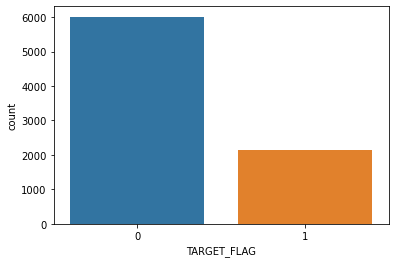

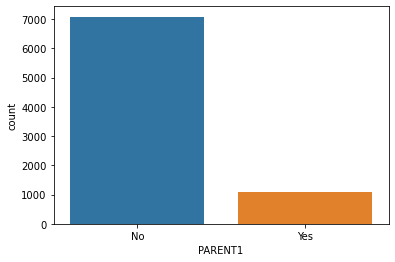

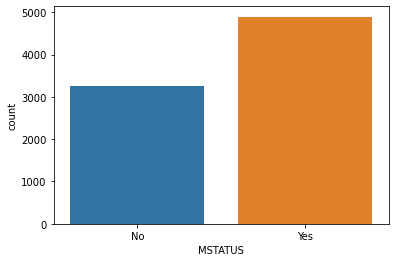

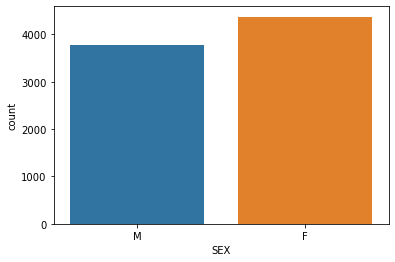

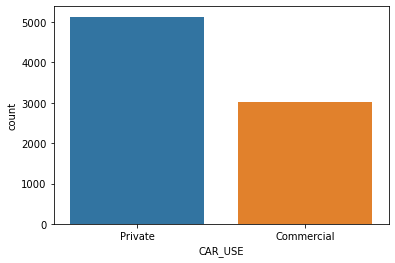

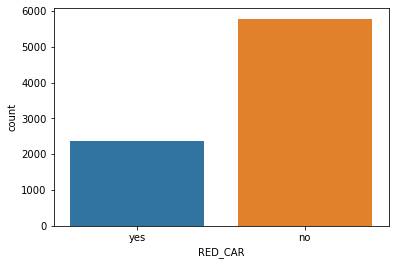

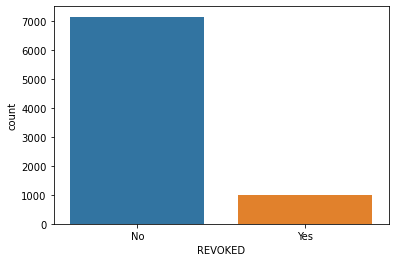

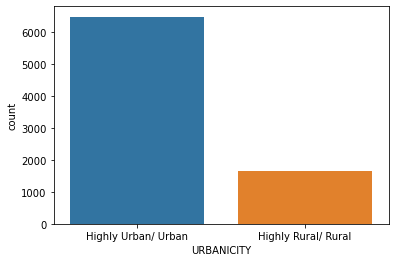

In [35]:
for i, column in enumerate(binary_variables):
    plt.figure(i)
    sns.countplot(x=column, data=train_df)

Before analysing data, we need to reformat each binary variable to be expressed as either 0 or 1, which is also a necessary step before training our prediction model.

- For example : instead of presenting "PARENT1" with Yes and No, we used 0 for No and 1 for Yes.

PARENT1 : No -> 0, Yes -> 1.

MSTATUS : No -> 0, Yes -> 1.

SEX : M -> 0, F -> 1.

CAR_USE : Private -> 0, Commercial -> 1.

RED_CAR : no -> 0, yes -> 1.

REVOKED : No -> 0, Yes -> 1.

URBANICITY : Highly Rural/Rural -> 0, Highly Urban/Urban -> 1

In [36]:
# Data converting : Binary variable to 0 : False or 1 : True.

for df in combine:
    df['PARENT1'] = df['PARENT1'].map({'No': 0, 'Yes': 1}).astype(int)
    df['MSTATUS'] = df['MSTATUS'].map({'No': 0, 'Yes': 1}).astype(int)
    df['SEX'] = df['SEX'].map({'M': 0, 'F': 1}).astype(int)
    df['CAR_USE'] = df['CAR_USE'].map({'Private': 0, 'Commercial': 1}).astype(int)
    df['RED_CAR'] = df['RED_CAR'].map({'no': 0, 'yes': 1}).astype(int)
    df['REVOKED'] = df['REVOKED'].map({'No': 0, 'Yes': 1}).astype(int)
    df['URBANICITY'] = df['URBANICITY'].map({'Highly Rural/ Rural': 0, 'Highly Urban/ Urban': 1}).astype(int)

In [37]:
# Show first 5 lines of training dataset
train_df.head()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0,60.0,0,11.0,67349.0,0,0.0,0,...,14230.0,11,Minivan,1,4461.0,2,0,3,18.0,1
1,2,0,0,43.0,0,11.0,91449.0,0,257252.0,0,...,14940.0,1,Minivan,1,0.0,0,0,0,1.0,1
2,4,0,0,35.0,1,10.0,16039.0,0,124191.0,1,...,4010.0,4,SUV,0,38690.0,2,0,3,10.0,1
3,5,0,0,51.0,0,14.0,54005.0,0,306251.0,1,...,15440.0,7,Minivan,1,0.0,0,0,0,6.0,1
4,6,0,0,50.0,0,12.0,114986.0,0,243925.0,1,...,18000.0,1,SUV,0,19217.0,2,1,3,17.0,1


In [38]:
# Remove TARGET_FLAG from binary variables list beacause it is the target variable in our prediction
binary_variables = ['PARENT1', 'MSTATUS', 'SEX', 'CAR_USE', 'RED_CAR', 'REVOKED', 'URBANICITY']

After converting, we focused on the correaltion of each binary variable with TARGET_FLAG.

We calculated the crash rate of each variable to better present the result.

- crash rate (per variable) = crash times / total samples * 100
    - crash times : total number of 1 in each feature
    - total samples : total samples of each feature

In [39]:
# A function helps us to make calculate crash rate for a list of given variables
# Inputs are df: datafarme, and columns: list of variables
# Output : A dataframe presents crash rate
def calculate_crash_rate(df, columns):
    analyse_df = pd.DataFrame()
    
    for variable in columns:
        crash_times = train_df[train_df['TARGET_FLAG'] == 1][variable].value_counts()
        total_times = train_df[variable].value_counts()
        total_times = df[variable].value_counts()
        
        analyse_df[variable] = crash_times / total_times * 100
        
    return analyse_df

In [40]:
# Analyse on the crash rate of binary variables
analyse_crash_rate_binary_df = calculate_crash_rate(train_df, binary_variables)

analyse_crash_rate_binary_df

,PARENT1,MSTATUS,SEX,CAR_USE,RED_CAR,REVOKED,URBANICITY
0,23.673066,33.670034,25.382990,21.551052,26.577901,23.879346,6.890354
1,44.196843,21.516142,27.245714,34.565863,25.904121,44.300000,31.392483


Text(0, 0.5, 'Crash rate (%)')

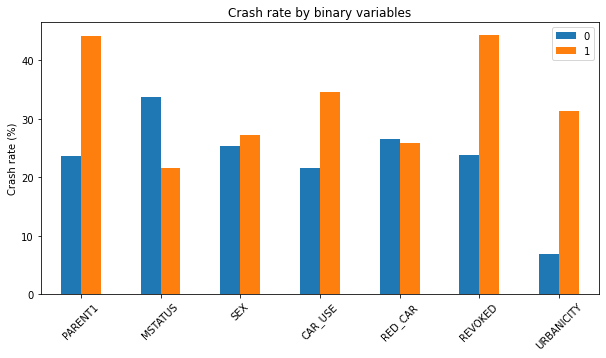

In [41]:
# plot analyse resultat

ax = analyse_crash_rate_binary_df.T.plot(kind='bar', rot=45, figsize=(10,5), title='Crash rate by binary variables')

ax.set_ylabel("Crash rate (%)")

From the chart above, we found that female drivers have a little higher crash rate than male drivers, but the difference is not big. There is no significant difference between a red car or not red (RED_CAR).

However, the rest of binary variables has different affect on crash rate: 

- For unmarried drivers (MSTATUS), they are more likely to have accidents than people who are married.

- For people who have parents alive (PARENT1), driving commercial vehicles (CAR_USE), who have been revoked and using vehicles (or living) in urban area (URBANICITY) always have a higher crash rate.

## Categorical variables (more than 2 categories)

In [42]:
categorical_variables = ['EDUCATION', 'CAR_TYPE', 'JOB']

In [43]:
# Analyse on EDUCATION
analyse_crash_rate_education = calculate_crash_rate(train_df, ['EDUCATION'])

analyse_crash_rate_education

,EDUCATION
<High School,32.003325
Bachelors,23.327386
High School,34.034335
Masters,19.722557
PhD,17.170330


Text(0, 0.5, 'Crash rate (%)')

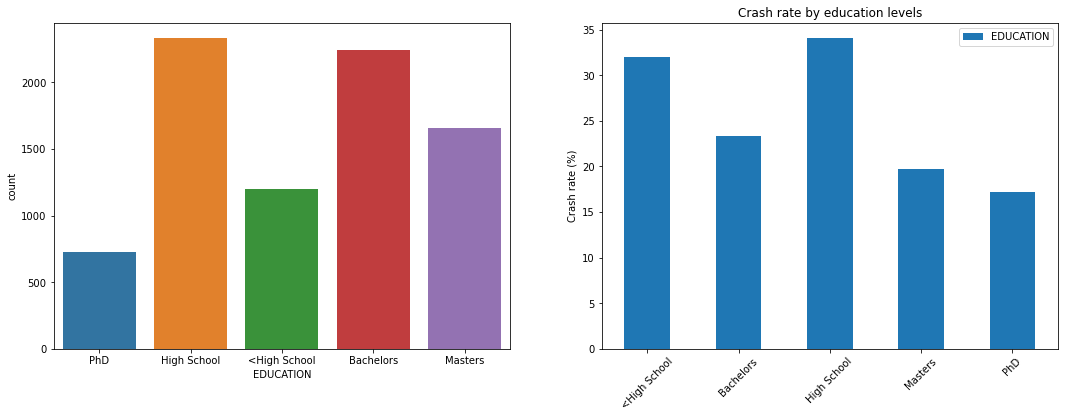

In [44]:
# plot analyse resultat
f, axes = plt.subplots(1,2,figsize=(18,6))

sns.countplot(x = train_df['EDUCATION'], ax=axes[0])
analyse_crash_rate_education.plot(kind='bar', rot=45, ax=axes[1], title='Crash rate by education levels')
axes[1].set_ylabel("Crash rate (%)")

The bar chart shows us the crash rate of by education levels.

We found that PhD has the lowest crash rate among 5 education levels. Masters just follow behind. Bachelors has the third lowest crash rate.

In addition, thoes drives with High School education level has a higher crash rate than under High School, which is the highest rate.

In [45]:
# Analyse on CAR_TYPE
analyse_crash_rate_car_type = calculate_crash_rate(train_df, ['CAR_TYPE'])

analyse_crash_rate_car_type

,CAR_TYPE
Minivan,16.270396
Panel Truck,26.331361
Pickup,31.893449
SUV,29.555362
Sports Car,33.517089
Van,26.800000


Text(0, 0.5, 'Crash rate (%)')

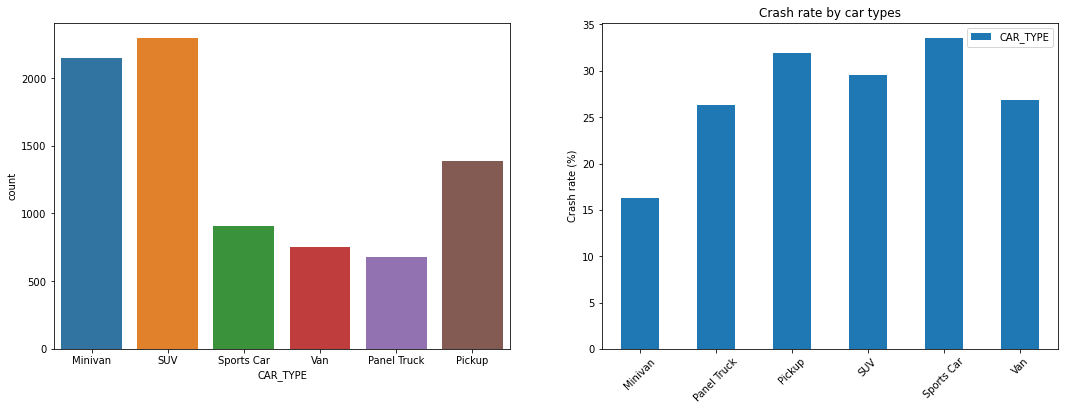

In [46]:
# plot analyse resultat
f, axes = plt.subplots(1,2,figsize=(18,6))

sns.countplot(x = train_df['CAR_TYPE'], ax=axes[0])
analyse_crash_rate_car_type.plot(kind='bar', rot=45, ax=axes[1], title='Crash rate by car types')
axes[1].set_ylabel("Crash rate (%)")

Sports Cars are more likeyly to have accidents than other type of cars. Pickups is the second dangerous type.

Otherwise, Minivans seem to be the most safe car in this analyse.

In [47]:
# Analyse on JOB
analyse_crash_rate_job = calculate_crash_rate(train_df, ['JOB'])

analyse_crash_rate_job

,JOB
Blue Collar,34.739726
Clerical,29.189614
Doctor,11.969112
Home Maker,28.081123
Lawyer,18.835616
Manager,17.739726
Professional,22.112802
Student,37.359551


Text(0, 0.5, 'Crash rate (%)')

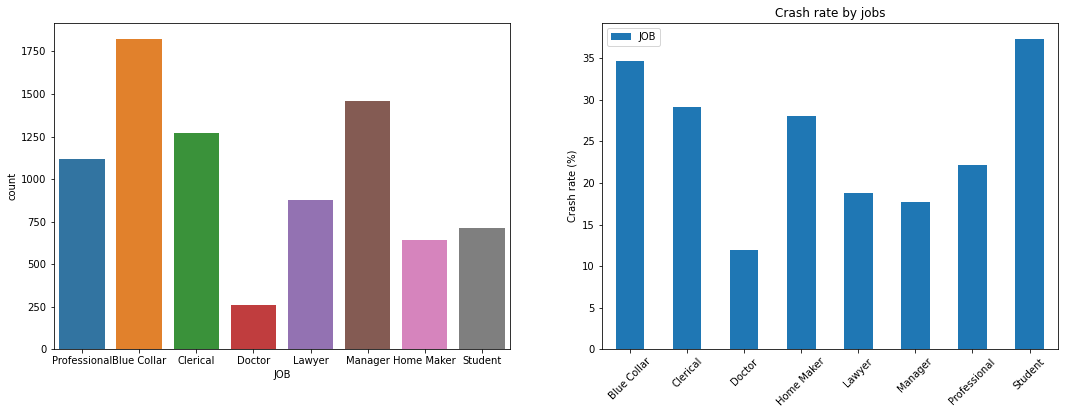

In [48]:
# plot analyse resultat
f, axes = plt.subplots(1,2,figsize=(18,6))

sns.countplot(x=train_df['JOB'], ax=axes[0])
analyse_crash_rate_job.plot(kind='bar', rot=45, ax=axes[1], title='Crash rate by jobs')
axes[1].set_ylabel("Crash rate (%)")

People who are student have the highest crash rate. Blue Collar is the second place. 

Doctors make less accidents, which seems to be correlated with education level. 

In [49]:
# Import scikit-learn 
from sklearn import preprocessing

# Data converting : Use 0, 1, 2, 4 to represent categorical variables

for category in categorical_variables:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[category].unique())
    train_df[category] = le.transform(train_df[category])
    test_df[category] = le.transform(test_df[category])
    
    print(category, ':')
    print({category: index for index, category in enumerate(le.classes_)})
    print('-'*100)

EDUCATION :
{'<High School': 0, 'Bachelors': 1, 'High School': 2, 'Masters': 3, 'PhD': 4}
----------------------------------------------------------------------------------------------------
CAR_TYPE :
{'Minivan': 0, 'Panel Truck': 1, 'Pickup': 2, 'SUV': 3, 'Sports Car': 4, 'Van': 5}
----------------------------------------------------------------------------------------------------
JOB :
{'Blue Collar': 0, 'Clerical': 1, 'Doctor': 2, 'Home Maker': 3, 'Lawyer': 4, 'Manager': 5, 'Professional': 6, 'Student': 7}
----------------------------------------------------------------------------------------------------


## Discrete numeric variables

There are some dsicrete numeric variables like KIDSDRIVE and HOMEKIDS. They have relatively few unique values. We could treat them as categorical variables.

At First, we need to have a statistic view about them.

<AxesSubplot:xlabel='count', ylabel='MVR_PTS'>

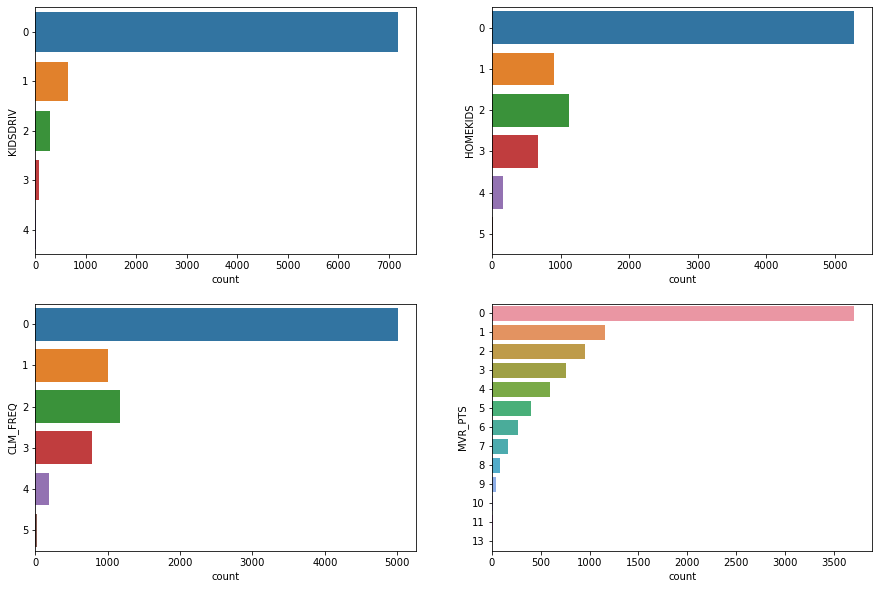

In [50]:
# plot analyse resultat
f, axes = plt.subplots(2,2,figsize=(15,10))

sns.countplot(y='KIDSDRIV', data=train_df, ax=axes[0,0])
sns.countplot(y='HOMEKIDS', data=train_df, ax=axes[0,1])
sns.countplot(y='CLM_FREQ', data=train_df, ax=axes[1,0])
sns.countplot(y='MVR_PTS', data=train_df, ax=axes[1,1])

According to the barplots above, we found that KIDSDRIV, HOMEKIDS, CLM_FREQ, these 3 variables could be converted to binary variables beacause the majority of samples are 0. The sum of the rest samples is much less than the majority in each variable. Therefore, we thought that all values > 0 could be considered as 1.

- For exemple, the new variable KIDSDRIV_binary means if the driver is driving with no children, the value = 0 (False), else the value = 1 (True)

For MVR_PTS, we found that there are too small amount of samples when the value > 10. In this case, we could consider all records with more than 10 MVR_PTS as having 10.

In [51]:
# Data converting 
for df in combine:
    df['KIDSDRIV_binary'] = df['KIDSDRIV'].apply(lambda x: 1 if x > 0 else 0)
    df['HOMEKIDS_binary'] = df['HOMEKIDS'].apply(lambda x: 1 if x > 0 else 0)
    df['CLM_FREQ_binary'] = df['CLM_FREQ'].apply(lambda x: 1 if x > 0 else 0)
    df['MVR_PTS_category'] = df['MVR_PTS'].apply(lambda x: 10 if x > 10 else x)

In [52]:
# Removing variables
train_df = train_df.drop(['KIDSDRIV', 'HOMEKIDS','CLM_FREQ'], axis=1)
test_df = test_df.drop(['KIDSDRIV', 'HOMEKIDS','CLM_FREQ'], axis=1)

In [53]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INDEX             8161 non-null   int64  
 1   TARGET_FLAG       8161 non-null   int64  
 2   AGE               8161 non-null   float64
 3   YOJ               8161 non-null   float64
 4   INCOME            8161 non-null   float64
 5   PARENT1           8161 non-null   int64  
 6   HOME_VAL          8161 non-null   float64
 7   MSTATUS           8161 non-null   int64  
 8   SEX               8161 non-null   int64  
 9   EDUCATION         8161 non-null   int64  
 10  JOB               8161 non-null   int64  
 11  TRAVTIME          8161 non-null   int64  
 12  CAR_USE           8161 non-null   int64  
 13  BLUEBOOK          8161 non-null   float64
 14  TIF               8161 non-null   int64  
 15  CAR_TYPE          8161 non-null   int64  
 16  RED_CAR           8161 non-null   int64  


In [54]:
# Analyse on the crash rate of new binary variables
analyse_crash_rate_3_binary = calculate_crash_rate(train_df, ['KIDSDRIV_binary', 'HOMEKIDS_binary', 'CLM_FREQ_binary'])

analyse_crash_rate_3_binary

,KIDSDRIV_binary,HOMEKIDS_binary,CLM_FREQ_binary
0,24.693593,22.178106,17.92773
1,38.735984,34.122563,39.81599


Text(0, 0.5, 'Crash rate (%)')

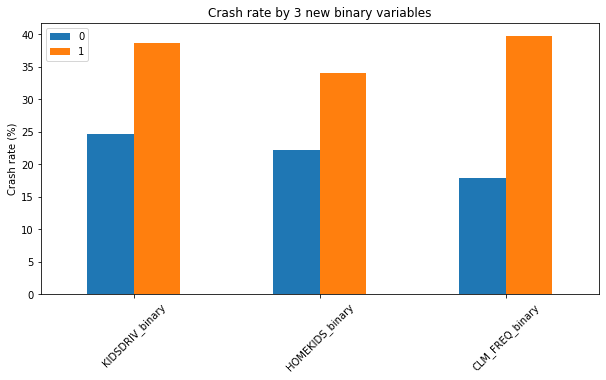

In [55]:
# plot analyse resultat
ax = analyse_crash_rate_3_binary.T.plot(kind='bar', rot=45, figsize=(10,5), title='Crash rate by 3 new binary variables')

ax.set_ylabel("Crash rate (%)")

Here we found that each of these new binary variables has influence on accident.

Those driving with children, have children at home and have at least one time CLM have higher crash rate.

In [56]:
# Analyse on MVR_PTS_category
analyse_crash_rate_mvr_category = calculate_crash_rate(train_df, ['MVR_PTS_category'])

analyse_crash_rate_mvr_category

,MVR_PTS_category
0,19.234914
1,23.422645
2,27.953586
3,31.794195
4,34.223706
5,37.343358
6,39.097744
7,56.287425
8,65.476190
9,73.333333


Text(0, 0.5, 'Crash rate (%)')

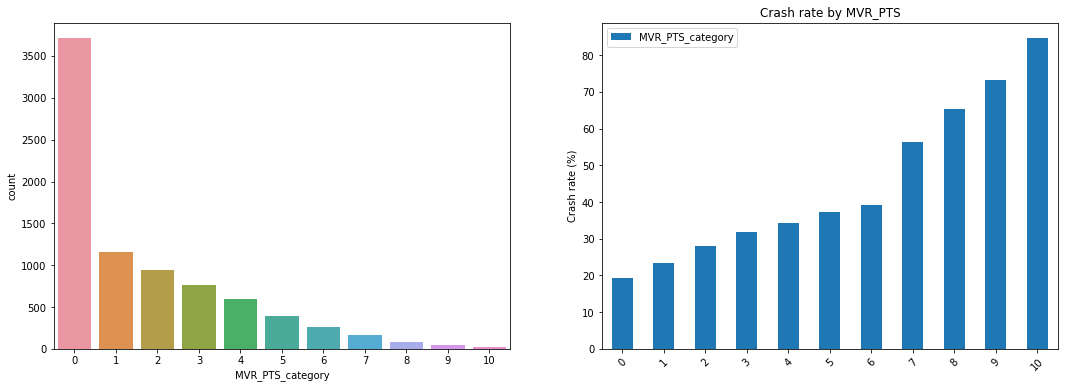

In [57]:
# plot analyse resultat
f, axes = plt.subplots(1,2,figsize=(18,6))

sns.countplot(x=train_df['MVR_PTS_category'], ax=axes[0])
analyse_crash_rate_mvr_category.plot(kind='bar', rot=45, ax=axes[1], title='Crash rate by MVR_PTS')
axes[1].set_ylabel("Crash rate (%)")

<AxesSubplot:>

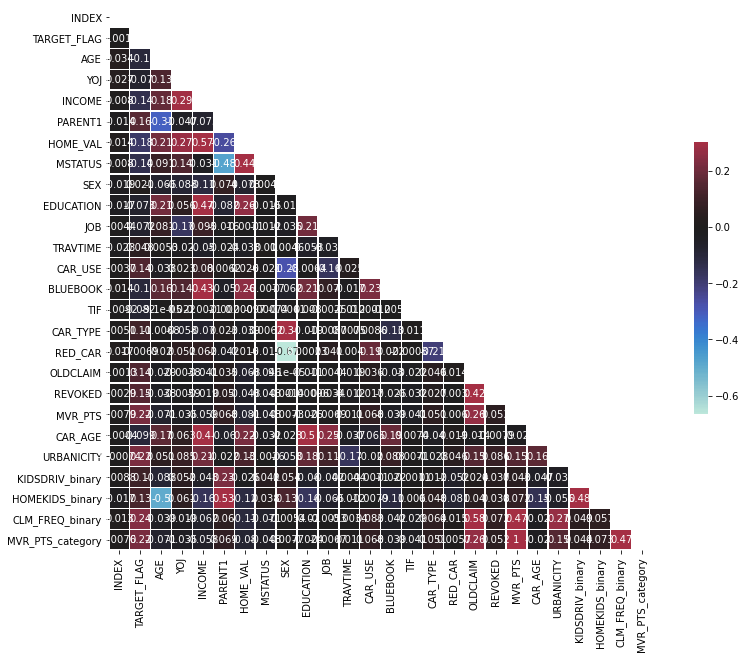

In [58]:
# Compute the correlation matrix
corr = train_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(data = corr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

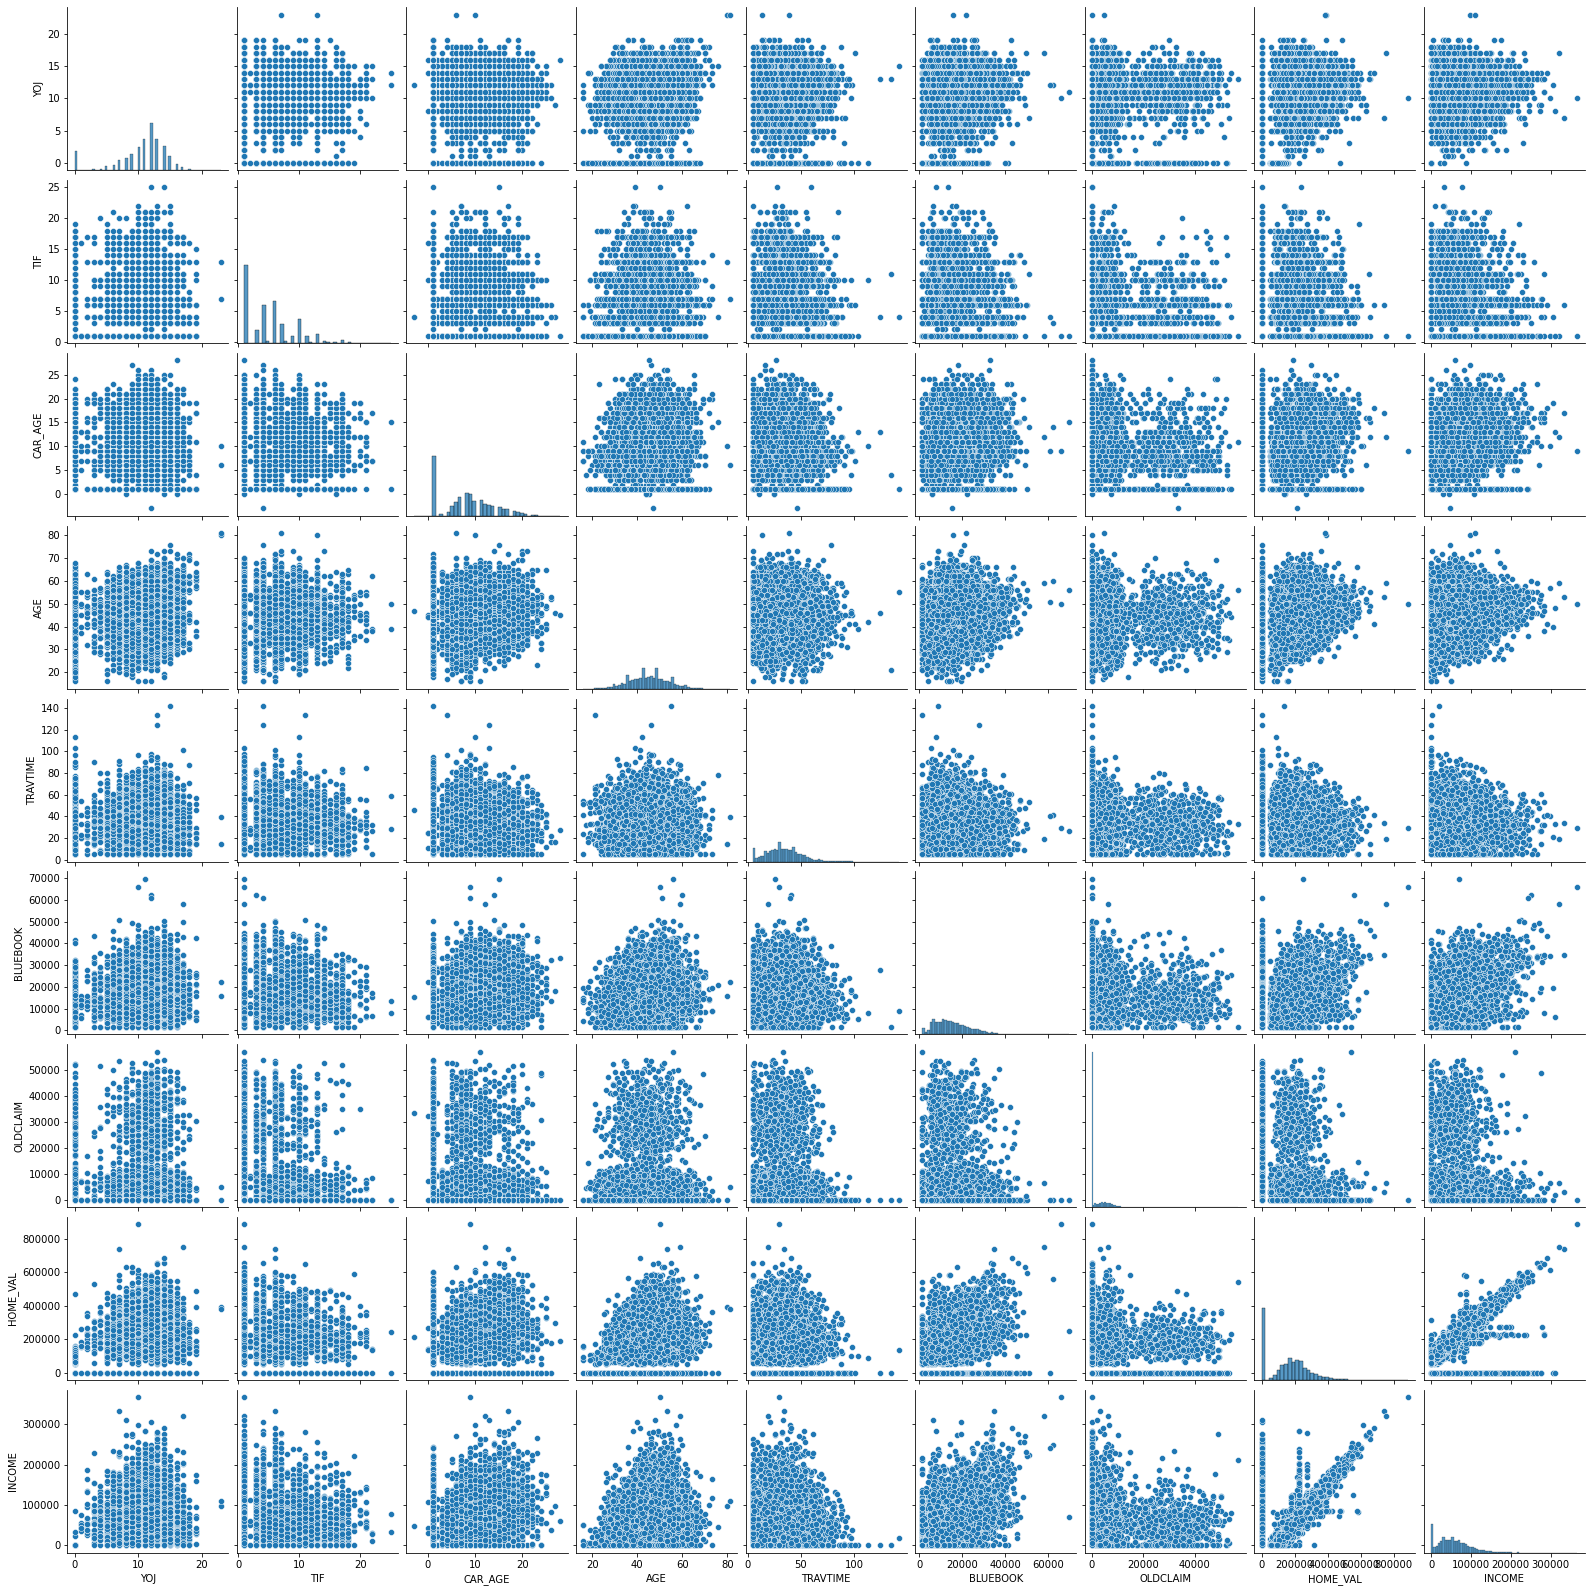

In [59]:
# plot the correlation between eahc numeric variables
numeric_variable_df = train_df[['YOJ', 'TIF', 'CAR_AGE', 'AGE', 'TRAVTIME', 'BLUEBOOK', 'OLDCLAIM', 'HOME_VAL', 'INCOME']]

sns.pairplot(numeric_variable_df)    

# 4. Prediction

Since it is a supervised classification problem, we decided to use RandomForest to make the prediction.

Here we divided training data into 2 parts (train set and test set) to create and test our model.

- X : all the variables (features) we use to make prediction
- y : true label (TARGET_FLAG) for each sample (0 : no crash, 1 : crashed)

After splitting our training data, we used X_train and y_train to create our inital predictive model. Next, we tested our model by using X_test and y_test to show its performance. We evaluated it by using confusion matrix and ROC curve. 

Finally, we brought X_valid, which is actually the testing data from auto_test.csv, into our model to obtain the predicted labels for samples in testing data.

In [60]:
# Divide training data into 2 parts : X: Features, y: Target variable

X = train_df.drop(['INDEX', 'TARGET_FLAG'], axis=1)
y = train_df['TARGET_FLAG']

In [61]:
# Split training data (X, y) into train set : X_train, y_train, and test set : X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5712, 24), (2449, 24), (5712,), (2449,))

There are 5712 samples with 24 features in the train set. We used them to create our model. And we used 2449 samples in the test set to better understand the performance of our model. 

In [63]:
# Using RandomForestClassifier to predict TARGET_FLAG
# All the models parameters are by default
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate the accuracy of predictions
pred_score = clf.score(X_test, y_test)

print('Prediction Score with RandomForest: ', pred_score)

Prediction Score with RandomForest:  0.7937933850551245


The score above is "the mean accuracy on the given test data and labels" (from scikit-learn).

Next, we will use confusion matrix and ROC curve to better understand the performance of our model.

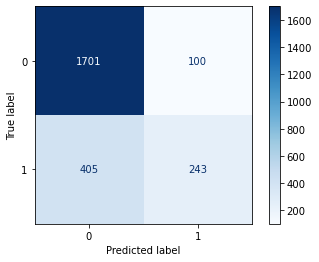

In [64]:
# Present confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix_plot = plot_confusion_matrix(clf, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Blues)

confusion_matrix_plot

True label is TARGET_FALG (y_text) with 0 and 1 to present car's status. We made prediction on X_test and obtained a series of labels, which is Predicted label. 

We compared True label and Predicted label to get confusion matrix and descried the performance. 

In [65]:
# tn : True negative, fp : False positive, fn : False negative, tp : True positive 


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('The accuracy : {}'.format(accuracy))
print('The precision : {}'.format(precision))
print('The recall : {}'.format(recall))

The accuracy : 0.7937933850551245
The precision : 0.7084548104956269
The recall : 0.375


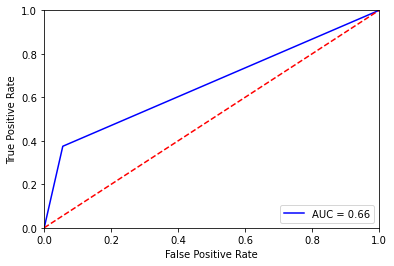

In [66]:
# ROC curve
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Prediction exporting


We made the prediciton on testing data (auto_text.csv) to get a series of predicted labels. And we should export them in a .csv file.

In [67]:
test_df.head()

,INDEX,TARGET_FLAG,AGE,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,...,RED_CAR,OLDCLAIM,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,KIDSDRIV_binary,HOMEKIDS_binary,CLM_FREQ_binary,MVR_PTS_category
0,3,NaN,48.0,11.0,52881.0,0,0.0,0,0,1,...,1,0.0,0,2,10.0,1,0,0,0,2
1,9,NaN,40.0,11.0,50815.0,1,0.0,0,0,2,...,0,3295.0,0,2,1.0,1,1,1,1,2
2,10,NaN,44.0,12.0,43486.0,1,0.0,0,1,2,...,0,0.0,0,0,10.0,0,0,1,0,0
3,18,NaN,35.0,12.0,21204.0,1,0.0,0,0,2,...,0,0.0,1,0,4.0,0,0,1,0,0
4,21,NaN,59.0,12.0,87460.0,0,0.0,0,0,2,...,1,44857.0,0,4,1.0,1,0,0,1,4


In [68]:
# Use or modle to make prediction in the testing data (test_auto.csv)
X_valid = test_df.drop(['INDEX', 'TARGET_FLAG'], axis=1)

In [69]:
X_valid.shape

(2141, 24)

We had 2141 samples in X_valid set (testing data)

In [70]:
# Export prediction data 

# clf is the predictive model we obtained above. 

Y_pred = clf.predict(X_valid)

In [71]:
output_df = pd.DataFrame({'INDEX': test_df['INDEX'],'TARGET_FLAG': Y_pred})

In [72]:
# output_df.to_csv('prediction_result.csv', index=False)

# 6. Conclusion

In this test, I used RandomForest method to solve this supervised classification problem, which is to predict whether a car is crashed or not.

Thanks a lot to DESCARTES UNDERWRITING for giving me a chance to pass this test and to show my abilities and knowledge in machine learning and data science. 

During this test, I have written the main steps of a data science project that I used to do, including data cleaning, data processing, data analysing, modelling and prediction. You will also find my comments in each cell of this notebook. 

Since the test is about 2 hours, I could not show all the parts of a data science project. So I write here some further improvements for the future study : 

- According to the analyses about each features, we could use more feature engeering skills to find more details about the relationship beween each variables, like creating new variables to describe more precisely. We could do more analysis on numeric variables like AGE, INCOME, HOME_VAL and so on.

- In this test, I chose RandomForest to make the prediciton, but there still have many other models like logestic regression, SVM or XGBoost we could use. 

- Check if the model is overfitting (or underfitting) is also an important point. This will affect model performance. We could trace learning curve and use cross-validation skill to evaluate this problem.

- In addtion, we could also using hyper-parameter tuning skills like Grid Search, Random Search or even Bayesian search to make our model more efficient and to have higher performance and accuracy.

At last, thank you again for this test, and hope to meet you soon.

Bolun ZHANG 